In [1]:
import numpy as np
import Normalization as nm
import matplotlib.pyplot as plt


In [2]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)


def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost


def plot_k_means(X, K, max_iter=20, beta=3.0, show_plots=False):
    N, D = X.shape
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    initial_centers = np.random.choice(N, K, replace=False)
    M = X[initial_centers]

    costs = []
    k = 0
    for i in range(max_iter):
        k += 1
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
        R = exponents / (exponents.sum(axis=1, keepdims=True)+0.000000000001)


        # step 2: recalculate means
        # decent vectorization
        # for k in range(K):
        #     M[k] = R[:,k].dot(X) / R[:,k].sum()
        # oldM = M

        # full vectorization
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
        # print("diff M:", np.abs(M - oldM).sum())

        c = cost(X, R, M)
        costs.append(c)
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 1e-5:
                break

        if len(costs) > 1:
            if costs[-1] > costs[-2]:
                pass
                # print("cost increased!")
                # print("M:", M)
                # print("R.min:", R.min(), "R.max:", R.max())

    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    #print("Final cost", costs[-1])
    return M, R



In [90]:
def plot_k_means11(X, K, m,max_iter=20, beta=3.0, show_plots=False):
    N, D = X.shape
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    initial_centers = np.random.choice(N, K, replace=False)
    M = m

    costs = []
    k = 0
    for i in range(max_iter):
        k += 1
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
        R = exponents / (exponents.sum(axis=1, keepdims=True)+0.000000000001)


        # step 2: recalculate means
        # decent vectorization
        # for k in range(K):
        #     M[k] = R[:,k].dot(X) / R[:,k].sum()
        # oldM = M

        # full vectorization
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
        # print("diff M:", np.abs(M - oldM).sum())

        c = cost(X, R, M)
        costs.append(c)
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 1e-5:
                break

        if len(costs) > 1:
            if costs[-1] > costs[-2]:
                pass
                # print("cost increased!")
                # print("M:", M)
                # print("R.min:", R.min(), "R.max:", R.max())

    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    #print("Final cost", costs[-1])
    return M, R



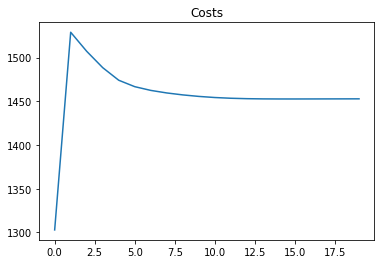

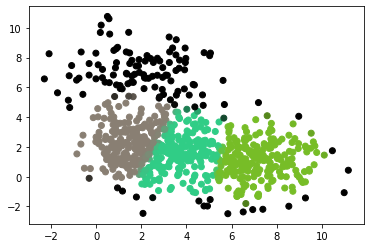

(array([[7.21731824, 1.13230073],
        [3.7374131 , 1.53891087],
        [1.46381482, 2.38173788]]),
 array([[7.52962115e-24, 9.99997726e-01, 2.11491918e-06],
        [1.09441550e-44, 9.53506438e-06, 6.10327950e-02],
        [1.43696165e-20, 9.99999066e-01, 9.34030336e-07],
        ...,
        [9.93012212e-01, 6.16599851e-03, 1.42886419e-19],
        [8.82445936e-01, 7.65213589e-36, 1.05542582e-74],
        [9.99999999e-01, 1.55709974e-26, 8.74584058e-64]]))

In [62]:
X = np.zeros((750,2))
X[:400,:] = np.random.multivariate_normal([2.5,2],[[2,0],[0,2]],400)
X[400:500,:] = np.random.multivariate_normal([1.5,7],[[2,0],[0,2]],100)
X[500:750,:] = np.random.multivariate_normal([7,1],[[2,0],[0,2]],250)

plot_k_means(X,3,show_plots=True)


In [77]:
N = nm.Normalization(X)

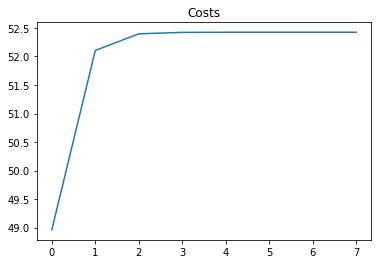

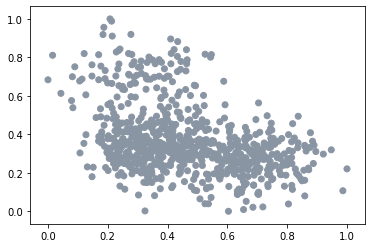

(array([[0.46257044, 0.36660447],
        [0.46255096, 0.36661987],
        [0.46254634, 0.36662353]]),
 array([[0.33333979, 0.33333114, 0.33332906],
        [0.33332976, 0.33333457, 0.33333567],
        [0.33333659, 0.33333223, 0.33333118],
        ...,
        [0.33334201, 0.33333037, 0.33332762],
        [0.33337115, 0.33332042, 0.33330842],
        [0.33337819, 0.33331803, 0.33330377]]))

In [78]:
plot_k_means(N,3,show_plots=True)

# The first-level clustering: divide the cluster into a bigger cluster

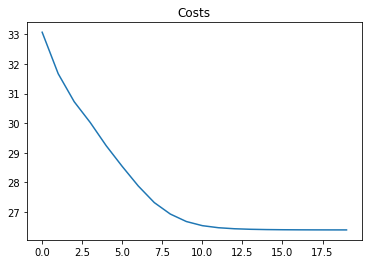

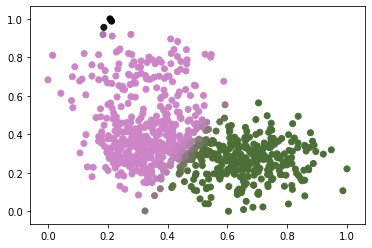

In [93]:
M,R = plot_k_means(N,2,beta=100,show_plots=True)

## The second stage 


the second stage need us to divde the big data into smaller clusters,and we need to calculate the actual number of the sub-class,first of all, we need to get the dataset from the previous classification

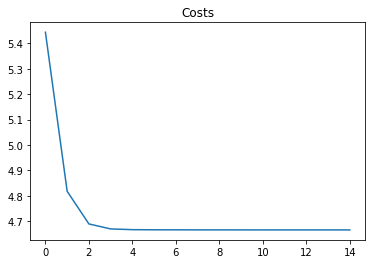

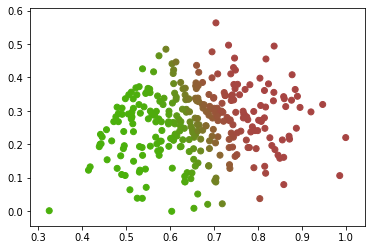

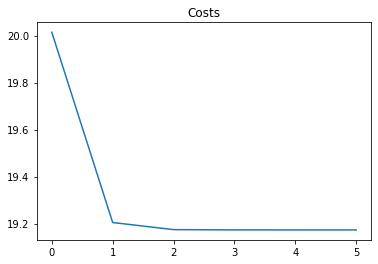

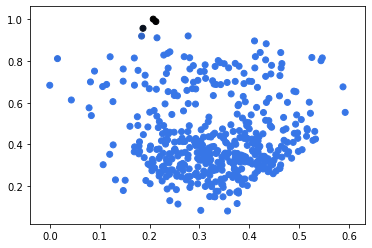

[[0.74694847 0.28863733]
 [0.57762664 0.24001824]] [[0.32970327 0.43145781]]


In [94]:

label = np.argmax(R,axis=1)

gnum = 2
Group = []
for i in range(gnum):
    index = np.where(label==i)
    Group.append(np.asarray(N[index,:]).reshape(len(index[0]),2))

#comupute the standard diviation 

std1 = np.average(np.std(Group[0],axis=0))
std2 = np.average(np.std(Group[1],axis=0))

#compute the Kc

k11 = Group[0].shape[0]*std1
k22 = Group[1].shape[0]*std1

k1 = round(k11/(k11+k22)*3)
k2 = round(k22/(k11+k22)*3)


# subclass
M1,R = plot_k_means(Group[0],2,beta=100,show_plots=True)
M2,R = plot_k_means(Group[1],1,beta=100,show_plots=True)


print(M1,M2)

In [95]:
M = np.concatenate((M1,M2),axis=0)
print(M)
Temp = M

[[0.74694847 0.28863733]
 [0.57762664 0.24001824]
 [0.32970327 0.43145781]]


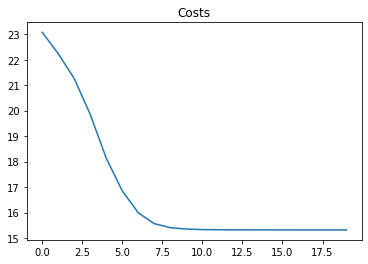

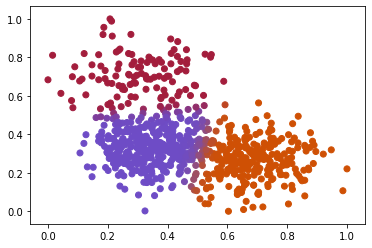

In [96]:
 MM,RR = plot_k_means11(N,3,Temp,max_iter=20,beta=100,show_plots = True)